# **Laboratorio 2 - Clasificador de canciones de Spotify**
Grupo 14: Noelia Cruz - Octavio Chañe - Diego Chañe 

Facultad de la Micro, Pequeña Y Mediana Empresa

Tecnicatura Universitaria en Tecnologías de Programación

Elementos de Aprendizaje de Máquina y Big Data

Universidad Provincial del Sudoeste - Noviembre 2023

# Importaciones

In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, precision_score, recall_score, f1_score
from sklearn import metrics
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px

# Declaraciones iniciales

## Variables globales

In [20]:

ruta_completa = './Canciones_Spotify.csv '


In [21]:
df = pd.read_csv(ruta_completa)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2017 entries, 0 to 2016
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        2017 non-null   int64  
 1   acousticness      2017 non-null   float64
 2   danceability      2017 non-null   float64
 3   duration_ms       2017 non-null   int64  
 4   energy            2017 non-null   float64
 5   instrumentalness  2017 non-null   float64
 6   key               2017 non-null   int64  
 7   liveness          2017 non-null   float64
 8   loudness          2017 non-null   float64
 9   mode              2017 non-null   int64  
 10  speechiness       2017 non-null   float64
 11  tempo             2017 non-null   float64
 12  time_signature    2017 non-null   float64
 13  valence           2017 non-null   float64
 14  target            2017 non-null   int64  
 15  song_title        2017 non-null   object 
 16  artist            2017 non-null   object 


Por la información mostrada, se ve que hay 2017 entradas de datos. N=20147. Raiz cuadrada de N = 44

In [22]:
df.head()   

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys


## Se generan 6 listas con las columnas de los parametros elegidos

In [23]:
lista1 = ['danceability', 'energy',  'speechiness', 'acousticness', 'valence'] # LISTA ELEGIDA POR OCTAVIO
lista2 = ['danceability', 'energy',  'speechiness', 'instrumentalness', 'liveness'] # LISTA ELEGIDA POR OCTAVIO
lista3 = ['danceability', 'energy',  'acousticness', 'valence', 'tempo'] # LISTA ELEGIDA POR DIEGO
lista4 = ['energy', 'loudness', 'acousticness', 'liveness', 'tempo'] # LISTA ELEGIDA POR DIEGO
lista5 = ['danceability', 'energy', 'speechiness', 'acousticness','instrumentalness','loudness', 'valence', 'tempo'] # LISTA ELEGIDA POR NOELIA
lista6 = ['danceability', 'energy', 'speechiness', 'acousticness','instrumentalness','liveness'] # LISTA ELEGIDA POR NOELIA


#### Lista1

In [24]:
lista1

['danceability', 'energy', 'speechiness', 'acousticness', 'valence']

En este primer caso, se trabaja con la lista1, con los campos listados.

In [25]:
# Se define los datos de entrada y salida
X1 = df[lista1]
Y1 = df['target']

In [26]:
# Datos de entrada (características)
X1.head()

,danceability,energy,speechiness,acousticness,valence
0,0.833,0.434,0.4310,0.0102,0.286
1,0.743,0.359,0.0794,0.1990,0.588
2,0.838,0.412,0.2890,0.0344,0.173
3,0.494,0.338,0.0261,0.6040,0.230
4,0.678,0.561,0.0694,0.1800,0.904


In [27]:
# Datos de salida (target) 1= agradable, 0= desagradable
Y1.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

Una vez definidos los datos de entrada y de salida a trabajar, se separan los datos de entrenamientos y de prueba

In [28]:
# Se pasan los datos a arreglos de numpy
X = X1.to_numpy()
y = Y1.to_numpy()

# Modelos de Machine Learning

### KNN (K-Nearest Neighbors)

#### Definición de funciones

In [33]:
# Se define una funcion que genera un K-clasificador con k vecinos (dada en la teorio de la materia)
def generate_clf_KNN(k, X_train, y_train):
    # Se arma el clasificador con el parametro k (cantidad de vecinos) 
    clasificadorKNN = KNeighborsClassifier(n_neighbors=k)
    # Se entrena el clasificador con los datos de entrenamiento de caracteristicas y target
    clasificadorKNN.fit(X_train, y_train.ravel())
    return clasificadorKNN


In [135]:
# Se define una funcion que pertime mostrar la grafica para seleccionar el mejor valor de k
def plot_knn_metrics(X, y, k_range=range(1,45,5), test_size=0.5, average='macro'):
    # Se define un diccionario con las metricas a evaluar
    metrics_functions = {
        'accuracy': accuracy_score,
        'precision': precision_score,
        'recall': recall_score,
        'f1': f1_score
    }
    # Se define una lista con las metricas a evaluar
    lista_metricas = metrics_functions.keys()
    # Se instancia la figura multiple
    fig = make_subplots( rows=2, cols=2,
                    subplot_titles=list(lista_metricas),
                    x_title="Número de vecinos (k)", y_title="Métricas",
                    vertical_spacing=0.1, horizontal_spacing=0.1,
                    )
    # Se recorre la lista de metricas
    for metric in lista_metricas:
            
        if metric not in metrics_functions.keys():
            raise ValueError(f"Métrica '{metric} no reconocida. Elige entre: {', '.join(metrics_functions.keys())}.")

        if metric in ['precision', 'recall', 'f1']:
            metric_function = lambda y_true, y_pred: metrics_functions[metric](y_true, y_pred, average=average)
        else:
            metric_function = metrics_functions[metric]
        # Se separan los datos de entrenamiento y de testeo con el tamaño test_size 
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)
        # Se inicializan las listas de puntajes de entrenamiento y prueba
        train_scores = []
        test_scores = []
        # Se recorre la lista de valores de k
        for k in k_range:
            # Se genera el clasificador con el valor de k
            knn = generate_clf_KNN(k, X_train, y_train)
            # Se predicen los valores de entrenamiento y prueba
            y_train_pred = knn.predict(X_train)
            y_test_pred = knn.predict(X_test)
            # Se calcula el puntaje de entrenamiento y prueba
            train_scores.append(metric_function(y_train, y_train_pred))
            test_scores.append(metric_function(y_test, y_test_pred))
        
        # Se define la fila y columna de la grafica
        if metric=='accuracy':
            fila=1
            col=1
        elif metric=='precision':
            fila=1
            col=2
        elif metric=='recall':
            fila=2
            col=1
        else:
            fila=2
            col=2

        # Se agrega la grafica de entrenamiento y prueba a la figura multiple        
        fig.add_trace(go.Scatter(x=list(k_range), y=train_scores, name=f'Entrenando {metric.capitalize()}'),
                row=fila, col=col)
                
        fig.add_trace(go.Scatter(x=list(k_range), y=test_scores, name=f'Probando con {metric.capitalize()}'),
                row=fila, col=col)
        fig.update_xaxes(tickvals=list(k_range))
        
    # Por ultimo se muestra la figura multiple
    fig.update_layout(height=800, width=1500,
                    title_text="Número de vecinos (k) vs Métricas")
    fig.show()


In [166]:
# Se define una funcion que permite mostrar las predicciones del clasificador
def mostrar_predicciones(X, y, k, test_size=0.5):
    
    # Se separan los datos de entrenamiento y de testeo con un test_size de 0.2
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

    # Se genera el clasificador con k=11
    knn = generate_clf_KNN(k, X_train, y_train)

    # Se obtiene el target predicho con los datos de prueba 
    y_pred = knn.predict(X_test)

    # se genera la matriz de confusion
    cm = confusion_matrix(y_test, y_pred)

    # se grafica la matriz de confusion
    plt.figure(figsize=(7,5))
    sns.heatmap(cm, annot=True, fmt='g', xticklabels=['Desagradable', 'Agradable'], yticklabels=['Desagradable', 'Agradable'])
    plt.title('Matriz de Confusión')
    plt.xlabel('Valor Predicho')
    plt.ylabel('Valor Real')
    plt.show()

    # Se obtiene el reporte de clasificacion
    print(classification_report(y_test, y_pred))

    # Se procede a la validacion cruzada
    scores = cross_val_score(knn, X, y.ravel(), cv=10) 

    # Se imprime los resultados de la validacion cruzada
    print( "Scores de la validación cruzada: ", scores)
    print("Promedio de los scores: ", scores.mean())
    print("Desviación estandar de los scores: ", scores.std())

    # Se procede a la validacion cruzada Kfold
    cv = KFold(n_splits=5, random_state=48, shuffle= True)
    scores = cross_val_score(knn, X, y.ravel(), cv=cv)
    print()
    # Se imprime los resultados de la validacion cruzada Kfold
    print( "Scores de la validación cruzada Kfold: ", scores)
    print("Promedio de los scores: ", scores.mean())
    print("Desviación estandar de los scores: ", scores.std())

##### Lista1, con test_size de 0.5

In [136]:
# se deja el test_size por defecto, que es de 0.5
plot_knn_metrics(X, y)


Por las gráficas, se observa que tomando k=31 se tiene la brecha más pequeña entre las curvas de entrenamiento y de prueba, con las distintas métricas.

In [144]:
# Se separan los datos de entrenamiento y de testeo con un test_size de 0.5
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

In [147]:
# Características de entrenamiento
X_train.shape

(1008, 6)

In [146]:
# Características de prueba
X_test.shape

(1009, 6)

In [148]:
# Se toma como valor de k=31
k=31
# Se genera el clasificador con k=31
knn = generate_clf_KNN(k, X_train, y_train)

In [150]:
# Se obtiene el target predicho con los datos de prueba 
y_pred = knn.predict(X_test)

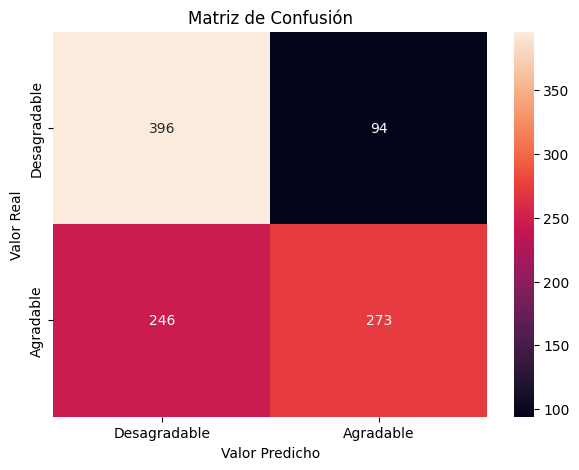

In [151]:
# se genera la matriz de confusion
cm = confusion_matrix(y_test, y_pred)

# se grafica la matriz de confusion
plt.figure(figsize=(7,5))
sns.heatmap(cm, annot=True, fmt='g', xticklabels=['Desagradable', 'Agradable'], yticklabels=['Desagradable', 'Agradable'])
plt.title('Matriz de Confusión')
plt.xlabel('Valor Predicho')
plt.ylabel('Valor Real')
plt.show()

In [152]:
# Se obtiene el reporte de clasificacion
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.62      0.81      0.70       490
           1       0.74      0.53      0.62       519

    accuracy                           0.66      1009
   macro avg       0.68      0.67      0.66      1009
weighted avg       0.68      0.66      0.66      1009



In [153]:
# Se procede a la validacion cruzada
scores = cross_val_score(knn, X, y.ravel(), cv=10) 

# Se imprime los resultados de la validacion cruzada
print( "Scores de la validación cruzada: ", scores)
print("Promedio de los scores: ", scores.mean())
print("Desviación estandar de los scores: ", scores.std())

Scores de la validación cruzada:  [0.74752475 0.56435644 0.65346535 0.64356436 0.56435644 0.54455446
 0.66336634 0.58208955 0.66666667 0.70646766]
Promedio de los scores:  0.6336411999408897
Desviación estandar de los scores:  0.06397942298025633


In [154]:
# Se procede a la validacion cruzada Kfold
cv = KFold(n_splits=5, random_state=48, shuffle= True)
scores = cross_val_score(knn, X, y.ravel(), cv=cv)

# Se imprime los resultados de la validacion cruzada Kfold
print( "Scores de la validación cruzada Kfold: ", scores)
print("Promedio de los scores: ", scores.mean())
print("Desviación estandar de los scores: ", scores.std())

Scores de la validación cruzada Kfold:  [0.65841584 0.62871287 0.65508685 0.65012407 0.65260546]
Promedio de los scores:  0.6489890180085005
Desviación estandar de los scores:  0.010502739210737298


##### Se sigue con la Lista1, pero con un test_size=0.2

In [155]:
# test_size = 0.2
plot_knn_metrics(X, y, test_size=0.2)

Por las gráficas, se observa que tomando k=11 se tiene la brecha más pequeña entre las curvas de entrenamiento y de prueba, con las distintas métricas.

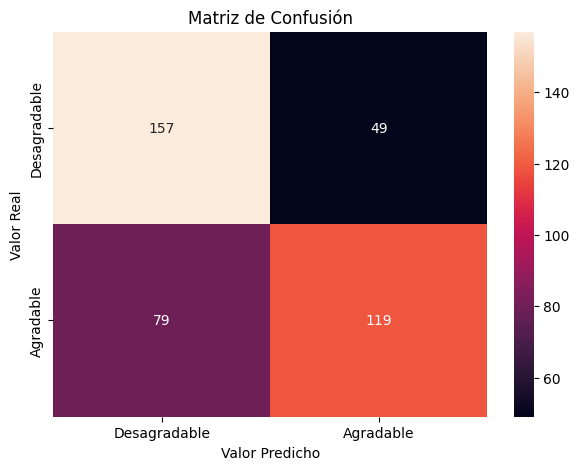

              precision    recall  f1-score   support

           0       0.67      0.76      0.71       206
           1       0.71      0.60      0.65       198

    accuracy                           0.68       404
   macro avg       0.69      0.68      0.68       404
weighted avg       0.69      0.68      0.68       404

Scores de la validación cruzada:  [0.73267327 0.54455446 0.61881188 0.66336634 0.61386139 0.57425743
 0.66336634 0.58208955 0.67661692 0.65174129]
Promedio de los scores:  0.6321338850302941
Desviación estandar de los scores:  0.05334597097501655

Scores de la validación cruzada Kfold:  [0.65346535 0.67326733 0.64764268 0.62531017 0.66501241]
Promedio de los scores:  0.6529395867626465
Desviación estandar de los scores:  0.016435863904845183


In [157]:
# Se separan los datos de entrenamiento y de testeo con un test_size de 0.2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Se toma como valor de k=11
k=11
# Se genera el clasificador con k=11
knn = generate_clf_KNN(k, X_train, y_train)

# Se obtiene el target predicho con los datos de prueba 
y_pred = knn.predict(X_test)

# se genera la matriz de confusion
cm = confusion_matrix(y_test, y_pred)

# se grafica la matriz de confusion
plt.figure(figsize=(7,5))
sns.heatmap(cm, annot=True, fmt='g', xticklabels=['Desagradable', 'Agradable'], yticklabels=['Desagradable', 'Agradable'])
plt.title('Matriz de Confusión')
plt.xlabel('Valor Predicho')
plt.ylabel('Valor Real')
plt.show()

# Se obtiene el reporte de clasificacion
print(classification_report(y_test, y_pred))

# Se procede a la validacion cruzada
scores = cross_val_score(knn, X, y.ravel(), cv=10) 

# Se imprime los resultados de la validacion cruzada
print( "Scores de la validación cruzada: ", scores)
print("Promedio de los scores: ", scores.mean())
print("Desviación estandar de los scores: ", scores.std())

# Se procede a la validacion cruzada Kfold
cv = KFold(n_splits=5, random_state=48, shuffle= True)
scores = cross_val_score(knn, X, y.ravel(), cv=cv)
print()
# Se imprime los resultados de la validacion cruzada Kfold
print( "Scores de la validación cruzada Kfold: ", scores)
print("Promedio de los scores: ", scores.mean())
print("Desviación estandar de los scores: ", scores.std())

#### Lista2

##### Con un test_size de 0.5

In [168]:
# Se define los datos de entrada y salida
X1 = df[lista2]
Y1 = df['target']

# Se pasan los datos a arreglos de numpy
X = X1.to_numpy()
y = Y1.to_numpy()

# Se separan los datos de entrenamiento y de testeo con un test_size de 0.5
plot_knn_metrics(X, y) 


Por las gráficas, se observa que tomando k=21 se tiene la brecha más pequeña entre las curvas de entrenamiento y de prueba, con las distintas métricas. Test_size=0.5

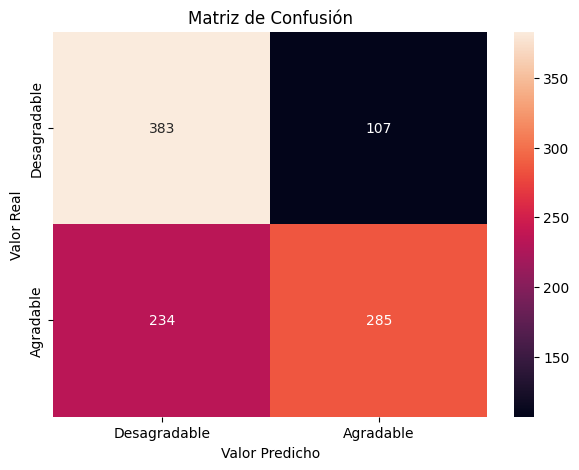

              precision    recall  f1-score   support

           0       0.62      0.78      0.69       490
           1       0.73      0.55      0.63       519

    accuracy                           0.66      1009
   macro avg       0.67      0.67      0.66      1009
weighted avg       0.68      0.66      0.66      1009

Scores de la validación cruzada:  [0.67326733 0.6039604  0.63861386 0.58910891 0.5990099  0.46039604
 0.64356436 0.60199005 0.67661692 0.68656716]
Promedio de los scores:  0.6173094921432443
Desviación estandar de los scores:  0.06225217424379723

Scores de la validación cruzada Kfold:  [0.6460396  0.6460396  0.63275434 0.64516129 0.64516129]
Promedio de los scores:  0.643031226199543
Desviación estandar de los scores:  0.005153433026963291


In [169]:
# Se llama a la funcion que muestra las predicciones con los X:datos de entrada,  y: target, k:21 y test_size=0.5 (valor por defecto) 
mostrar_predicciones(X, y, k=21)

##### Se sigue con la Lista2, pero con un test_size=0.2

In [170]:
# Se separan los datos de entrenamiento y de testeo con un test_size de 0.2
plot_knn_metrics(X, y, test_size=0.2)


Por las gráficas, se observa que tomando k=16 se tiene la brecha más pequeña entre las curvas de entrenamiento y de prueba, con las distintas métricas. Test_size=0.2

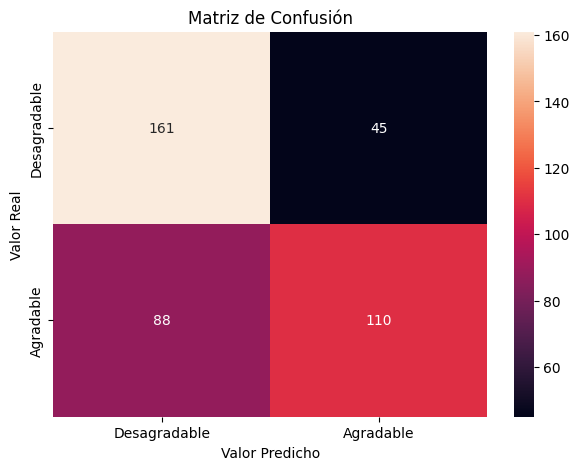

              precision    recall  f1-score   support

           0       0.65      0.78      0.71       206
           1       0.71      0.56      0.62       198

    accuracy                           0.67       404
   macro avg       0.68      0.67      0.67       404
weighted avg       0.68      0.67      0.67       404

Scores de la validación cruzada:  [0.65346535 0.58415842 0.64356436 0.58910891 0.58910891 0.46039604
 0.64851485 0.5721393  0.69154229 0.68159204]
Promedio de los scores:  0.6113590463523965
Desviación estandar de los scores:  0.06450638035145662

Scores de la validación cruzada Kfold:  [0.66584158 0.65841584 0.63275434 0.63523573 0.66253102]
Promedio de los scores:  0.6509557035107977
Desviación estandar de los scores:  0.014068674726349595


In [171]:
# Se llama a la funcion que muestra las predicciones con los X:datos de entrada,  y: target, k:16 y test_size=0.2
mostrar_predicciones(X, y, k=16, test_size=0.2)

#### Lista3

##### Se analiza la Lista3 con test_size=0.5

In [172]:
# Se define los datos de entrada y salida
X1 = df[lista3]
Y1 = df['target']

# Se pasan los datos a arreglos de numpy
X = X1.to_numpy()
y = Y1.to_numpy()

plot_knn_metrics(X, y) 

Por las gráficas, se observa que tomando k=26 se tiene la brecha más pequeña entre las curvas de entrenamiento y de prueba, con las distintas métricas.

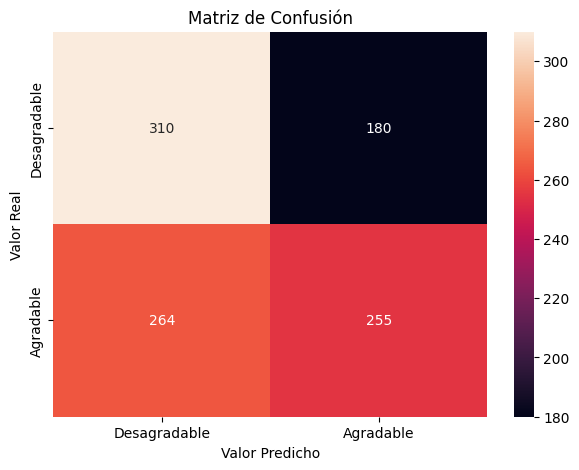

              precision    recall  f1-score   support

           0       0.54      0.63      0.58       490
           1       0.59      0.49      0.53       519

    accuracy                           0.56      1009
   macro avg       0.56      0.56      0.56      1009
weighted avg       0.56      0.56      0.56      1009

Scores de la validación cruzada:  [0.56930693 0.53960396 0.45049505 0.47029703 0.52970297 0.53960396
 0.53465347 0.58208955 0.5721393  0.5920398 ]
Promedio de los scores:  0.5379932023053051
Desviación estandar de los scores:  0.043972489263146196

Scores de la validación cruzada Kfold:  [0.58415842 0.56435644 0.58312655 0.53598015 0.56575682]
Promedio de los scores:  0.5666756750116698
Desviación estandar de los scores:  0.017462623092947594


In [173]:
# Se llama a la funcion que muestra las predicciones con los X:datos de entrada,  y: target, k:26 y test_size=0.5 (valor por defecto)
mostrar_predicciones(X, y, k=26)

##### Se analiza la Lista3 con un test_size=0.2

In [174]:
# Se utiliza el test_size=0.2
plot_knn_metrics(X, y, test_size=0.2)

Se puede observar por las gráficas, que tomando k=31 se tiene la brecha más pequeña entre las curvas de entrenamiento y de prueba. Test_size=0.2

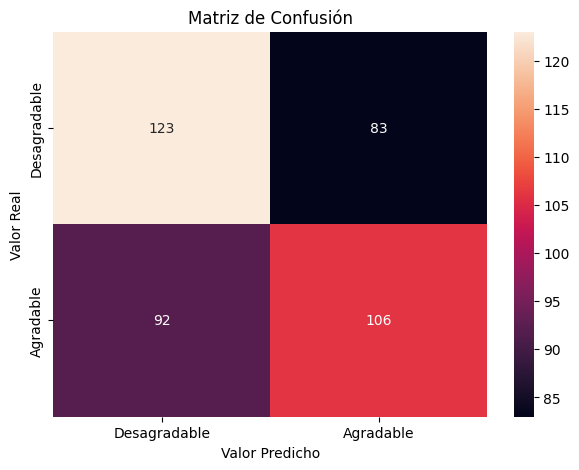

              precision    recall  f1-score   support

           0       0.57      0.60      0.58       206
           1       0.56      0.54      0.55       198

    accuracy                           0.57       404
   macro avg       0.57      0.57      0.57       404
weighted avg       0.57      0.57      0.57       404

Scores de la validación cruzada:  [0.58415842 0.52475248 0.49009901 0.48019802 0.51980198 0.56435644
 0.53960396 0.5721393  0.55721393 0.5920398 ]
Promedio de los scores:  0.5424363331855574
Desviación estandar de los scores:  0.03637063249079052

Scores de la validación cruzada Kfold:  [0.53960396 0.56188119 0.56079404 0.51364764 0.55334988]
Promedio de los scores:  0.5458553423580572
Desviación estandar de los scores:  0.017958709794556386


In [175]:
# Se llama a la funcion que muestra las predicciones con los X:datos de entrada, y: target, k:31 y test_size=0.2
mostrar_predicciones(X, y, k=31, test_size=0.2)

#### Lista4

In [177]:
lista4

['energy', 'loudness', 'acousticness', 'liveness', 'tempo']

##### Se analiza la Lista4 con test_size=0.5

In [181]:
# Se define los datos de entrada y salida
X1 = df[lista4]
Y1 = df['target']

# Se pasan los datos a arreglos de numpy
X = X1.to_numpy()
y = Y1.to_numpy()

plot_knn_metrics(X, y)

Por las gráficas, se observa que tomando k=16 se tiene la brecha más pequeña entre las curvas de entrenamiento y de prueba, con las distintas métricas.

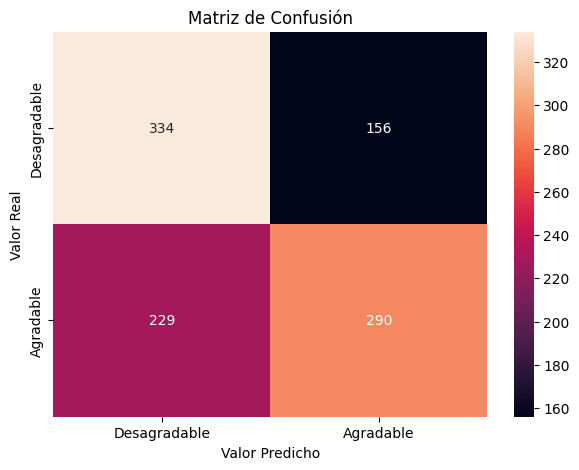

              precision    recall  f1-score   support

           0       0.59      0.68      0.63       490
           1       0.65      0.56      0.60       519

    accuracy                           0.62      1009
   macro avg       0.62      0.62      0.62      1009
weighted avg       0.62      0.62      0.62      1009

Scores de la validación cruzada:  [0.72772277 0.58910891 0.62376238 0.56435644 0.63861386 0.36138614
 0.56930693 0.53233831 0.60696517 0.58706468]
Promedio de los scores:  0.5800625584946554
Desviación estandar de los scores:  0.08857507055099112

Scores de la validación cruzada Kfold:  [0.57178218 0.61138614 0.63771712 0.61290323 0.62779156]
Promedio de los scores:  0.6123160455003317
Desviación estandar de los scores:  0.022489598579028047


In [182]:
# Se llama a la funcion mostrar_predicciones con los X:datos de entrada, y: target, k:16 y test_size=0.5 (valor por defecto)
mostrar_predicciones(X, y, k=16)


##### Lista4 con un test_size=0.2

In [183]:
# Se utiliza el test_size=0.2
plot_knn_metrics(X, y, test_size=0.2)

Se puede observar que con k=36, se obtiene la menor diferencia entre las curvas.

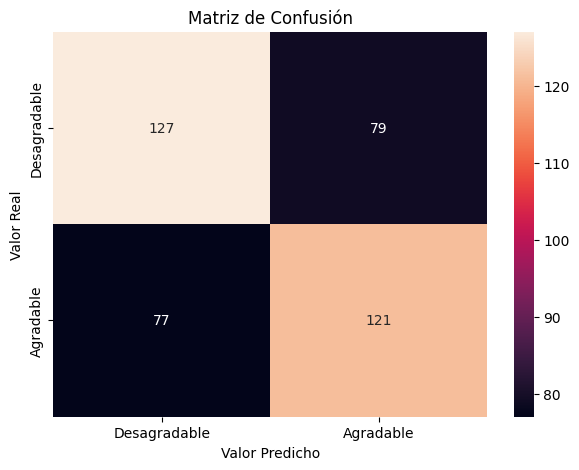

              precision    recall  f1-score   support

           0       0.62      0.62      0.62       206
           1       0.60      0.61      0.61       198

    accuracy                           0.61       404
   macro avg       0.61      0.61      0.61       404
weighted avg       0.61      0.61      0.61       404

Scores de la validación cruzada:  [0.75742574 0.61881188 0.64356436 0.58910891 0.61881188 0.39108911
 0.5990099  0.56716418 0.65671642 0.58706468]
Promedio de los scores:  0.6028767055810058
Desviación estandar de los scores:  0.08690877935718323

Scores de la validación cruzada Kfold:  [0.61633663 0.6039604  0.6426799  0.62779156 0.62282878]
Promedio de los scores:  0.6227194555683856
Desviación estandar de los scores:  0.01278123883529935


In [184]:
# Se llama a la funcion mostrar_predicciones con los X:datos de entrada, y: target, k:36 y test_size=0.2
mostrar_predicciones(X, y, k=36, test_size=0.2)

#### Lista 5

In [185]:
lista5

['danceability',
 'energy',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'loudness',
 'valence',
 'tempo']

##### Lista5 con un test_size=0.5

In [186]:
# Se define los datos de entrada y salida
X1 = df[lista5]
Y1 = df['target']

# Se pasan los datos a arreglos de numpy
X = X1.to_numpy()
y = Y1.to_numpy()

plot_knn_metrics(X, y) 


Por las gráficas, se observa que tomando k=16 se tiene la brecha más pequeña entre las curvas de entrenamiento y de prueba, con las distintas métricas.

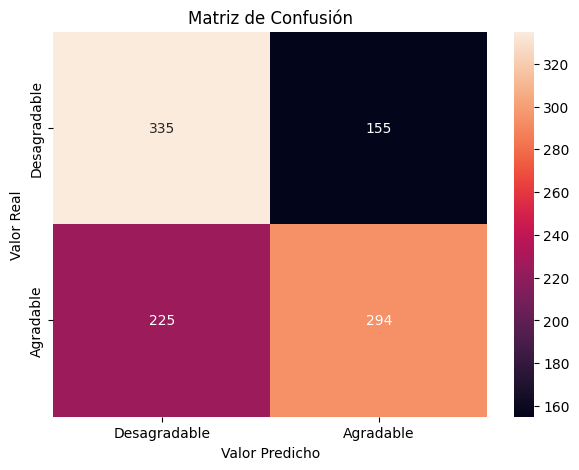

              precision    recall  f1-score   support

           0       0.60      0.68      0.64       490
           1       0.65      0.57      0.61       519

    accuracy                           0.62      1009
   macro avg       0.63      0.63      0.62      1009
weighted avg       0.63      0.62      0.62      1009

Scores de la validación cruzada:  [0.71287129 0.58415842 0.62376238 0.57920792 0.61881188 0.37128713
 0.56435644 0.54228856 0.6119403  0.60199005]
Promedio de los scores:  0.5810674351017191
Desviación estandar de los scores:  0.08234955609709788

Scores de la validación cruzada Kfold:  [0.56930693 0.62128713 0.63523573 0.60297767 0.64019851]
Promedio de los scores:  0.6138011940151832
Desviación estandar de los scores:  0.025726193597409817


In [187]:
# Se llama a la funcion mostrar_predicciones con los X:datos de entrada, y: target, k:16 y test_size=0.5 (valor por defecto)
mostrar_predicciones(X, y, k=16)

##### Lista5 con test_size=0.2

In [188]:
# Se utiliza el test_size=0.2
plot_knn_metrics(X, y, test_size=0.2) 


Por las gráficas, se observa que tomando k=11 se tiene la brecha más pequeña entre las curvas de entrenamiento y de prueba, con las distintas métricas.

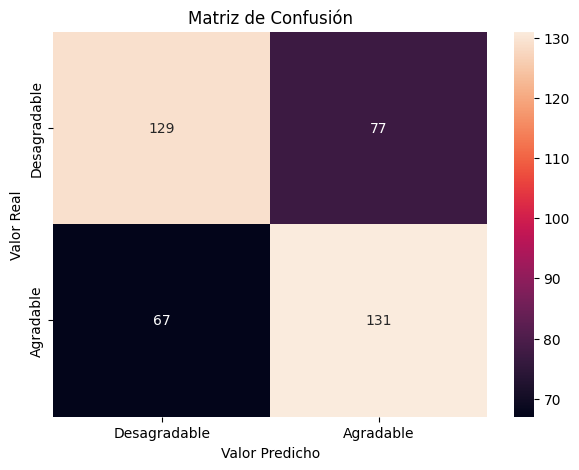

              precision    recall  f1-score   support

           0       0.66      0.63      0.64       206
           1       0.63      0.66      0.65       198

    accuracy                           0.64       404
   macro avg       0.64      0.64      0.64       404
weighted avg       0.64      0.64      0.64       404

Scores de la validación cruzada:  [0.73762376 0.60891089 0.64356436 0.54950495 0.60891089 0.42079208
 0.59405941 0.51741294 0.64676617 0.57711443]
Promedio de los scores:  0.5904659868971972
Desviación estandar de los scores:  0.08019972183375315

Scores de la validación cruzada Kfold:  [0.58663366 0.61881188 0.64764268 0.63027295 0.64019851]
Promedio de los scores:  0.6247119376950102
Desviación estandar de los scores:  0.02136044675663093


In [189]:
#Se invoca a la funcion mostrar_predicciones con los X:datos de entrada, y: target, k:11 y test_size=0.2
mostrar_predicciones(X, y, k=11, test_size=0.2)

#### Lista 6

In [190]:
lista6

['danceability',
 'energy',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'liveness']

##### Lista6 con el test_size de 0.5

In [191]:
# Se define los datos de entrada y salida
X1 = df[lista6]
Y1 = df['target']

# Se pasan los datos a arreglos de numpy
X = X1.to_numpy()
y = Y1.to_numpy()


plot_knn_metrics(X, y) 


Por las gráficas, se observa que tomando k=31 se tiene la brecha más pequeña entre las curvas de entrenamiento y de prueba, con las distintas métricas.

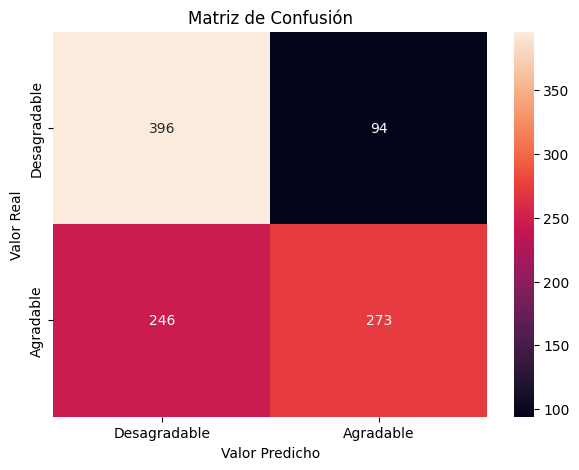

              precision    recall  f1-score   support

           0       0.62      0.81      0.70       490
           1       0.74      0.53      0.62       519

    accuracy                           0.66      1009
   macro avg       0.68      0.67      0.66      1009
weighted avg       0.68      0.66      0.66      1009

Scores de la validación cruzada:  [0.74752475 0.56435644 0.65346535 0.64356436 0.56435644 0.54455446
 0.66336634 0.58208955 0.66666667 0.70646766]
Promedio de los scores:  0.6336411999408897
Desviación estandar de los scores:  0.06397942298025633

Scores de la validación cruzada Kfold:  [0.65841584 0.62871287 0.65508685 0.65012407 0.65260546]
Promedio de los scores:  0.6489890180085005
Desviación estandar de los scores:  0.010502739210737298


In [192]:
# Se llama a la funcion mostrar_predicciones con los X:datos de entrada, y: target, k:31 y test_size=0.5 (valor por defecto)
mostrar_predicciones(X, y, k=31)


##### Lista6 con test_size=0.2

In [193]:
# Se utiliza el test_size=0.2
plot_knn_metrics(X, y, test_size=0.2)

De las graficas, vamos a analizar con k=11 y k=36

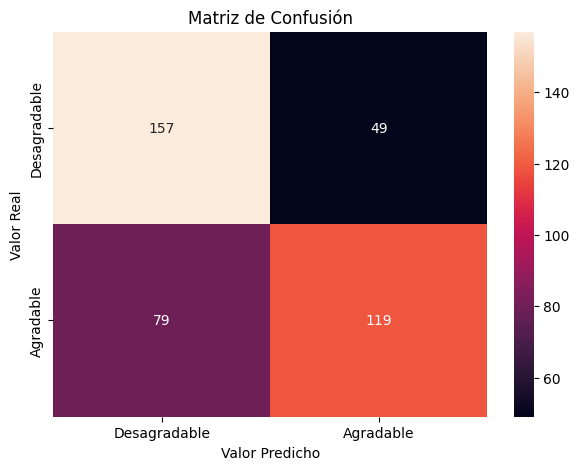

              precision    recall  f1-score   support

           0       0.67      0.76      0.71       206
           1       0.71      0.60      0.65       198

    accuracy                           0.68       404
   macro avg       0.69      0.68      0.68       404
weighted avg       0.69      0.68      0.68       404

Scores de la validación cruzada:  [0.73267327 0.54455446 0.61881188 0.66336634 0.61386139 0.57425743
 0.66336634 0.58208955 0.67661692 0.65174129]
Promedio de los scores:  0.6321338850302941
Desviación estandar de los scores:  0.05334597097501655

Scores de la validación cruzada Kfold:  [0.65346535 0.67326733 0.64764268 0.62531017 0.66501241]
Promedio de los scores:  0.6529395867626465
Desviación estandar de los scores:  0.016435863904845183


In [194]:
# Se llama a la funcion mostrar_predicciones con los X:datos de entrada, y: target, k:11 y test_size=0.2
mostrar_predicciones(X, y, k=11, test_size=0.2)

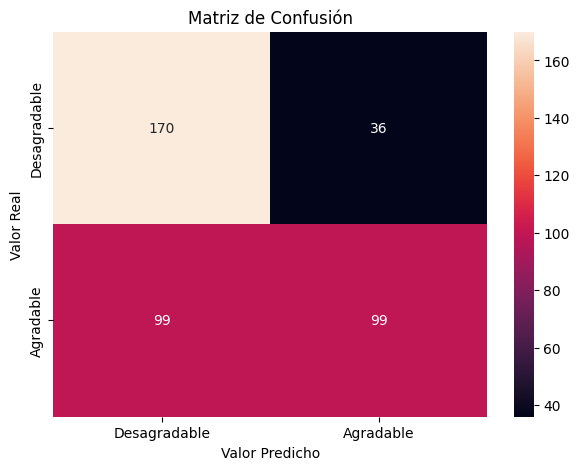

              precision    recall  f1-score   support

           0       0.63      0.83      0.72       206
           1       0.73      0.50      0.59       198

    accuracy                           0.67       404
   macro avg       0.68      0.66      0.66       404
weighted avg       0.68      0.67      0.66       404

Scores de la validación cruzada:  [0.72772277 0.54950495 0.65346535 0.62871287 0.56435644 0.51485149
 0.64356436 0.58706468 0.70149254 0.69651741]
Promedio de los scores:  0.6267252844687453
Desviación estandar de los scores:  0.06753197440851567

Scores de la validación cruzada Kfold:  [0.67574257 0.62376238 0.6674938  0.65260546 0.65012407]
Promedio de los scores:  0.6539456551114169
Desviación estandar de los scores:  0.01781060799541955


In [195]:
# Se llama a la funcion mostrar_predicciones con los X:datos de entrada, y: target, k:36 y test_size=0.2
mostrar_predicciones(X, y, k=36, test_size=0.2)

##### De los resultados obtenidos, nos quedamos con la lista 6. k=11. test_size=0.2 . Lista ganadora de Noelia Cruz

### Modelo SVM (Support Vector Machines)

In [197]:
# Se define los datos de entrada y salida
X1 = df[lista6]
Y1 = df['target']

# Se pasan los datos a arreglos de numpy
X = X1.to_numpy()
y = Y1.to_numpy()



#### Lista 6 con un test_size=0.5

In [ ]:
# Se separan los datos de entrenamiento y de testeo con el tamaño test_size=0.5
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

In [198]:
# Se instancia el clasificador SVC
svc= SVC()

# Se define la grilla de parametros a probar
param_grid ={
    'kernel': ['linear', 'poly', 'rbf'],
    'C': [0.1, 1, 10],
    'gamma': [0.1, 1, 10]
}

# Se busca el mejor clasificador con los parametros definidos scoring='accuracy'
grid_search = GridSearchCV(svc, param_grid, cv=5, scoring='accuracy')
# Se entrena el clasificador con los datos de entrenamiento
grid_search.fit(X_train, y_train)

# Se muestra los mejores parametros
print("Scoring: Accuaracy")
print("Mejores parametros: ", grid_search.best_params_)
# Se muestra el mejor score
print("Mejor Score: ", grid_search.best_score_)


Scoring: Accuaracy
Mejores parametros:  {'C': 10, 'gamma': 10, 'kernel': 'poly'}
Mejor Score:  0.690443820501453


In [203]:
# Se busca el mejor clasificador con los parametros definidos scoring='precision'
grid_search = GridSearchCV(svc, param_grid, cv=5, scoring='precision')
# Se entrena el clasificador con los datos de entrenamiento
grid_search.fit(X_train, y_train)
# Se muestra los mejores parametros
print("Scoring: Precision")
print("Mejores parametros: ", grid_search.best_params_)
# Se muestra el mejor score
print("Mejor Score: ", grid_search.best_score_)


c:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMet

Scoring: Precision
Mejores parametros:  {'C': 0.1, 'gamma': 0.1, 'kernel': 'rbf'}
Mejor Score:  0.8336523125996809


In [204]:
# Se busca el mejor clasificador con los parametros definidos scoring='recall'
grid_search = GridSearchCV(svc, param_grid, cv=5, scoring='recall') 
# Se entrena el clasificador con los datos de entrenamiento
grid_search.fit(X_train, y_train)
# Se muestra los mejores parametros
print("Scoring: Recall")
print("Mejores parametros: ", grid_search.best_params_)
# Se muestra el mejor score
print("Mejor Score: ", grid_search.best_score_)

Scoring: Recall
Mejores parametros:  {'C': 10, 'gamma': 10, 'kernel': 'rbf'}
Mejor Score:  0.5888712871287127


In [205]:
# Se busca el mejor clasificador con los parametros definidos scoring='f1'
grid_search = GridSearchCV(svc, param_grid, cv=5, scoring='f1')
# Se entrena el clasificador con los datos de entrenamiento
grid_search.fit(X_train, y_train)
# Se muestra los mejores parametros
print("Scoring: f1")
print("Mejores parametros: ", grid_search.best_params_)
# Se muestra el mejor score
print("Mejor Score: ", grid_search.best_score_)

Scoring: f1
Mejores parametros:  {'C': 10, 'gamma': 10, 'kernel': 'poly'}
Mejor Score:  0.6427038377495315


##### Entonces se toma como los mejores parametros primero: scoring: precision, 'C': 0.1, 'gamma': 0.1, 'kernel': 'rbf con 0.8336523125996809 y el de scoring Accuracy: 'C': 10, 'gamma': 10, 'kernel': 'poly', con un score de 0.690443820501453

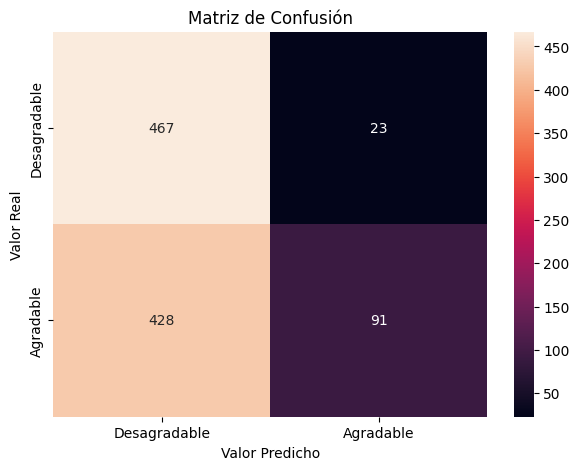

In [206]:
# Se instancia el clasificador SVC con los mejores parametros
best_svc= SVC(C=0.1, gamma=0.1, kernel='rbf')
# Se entrena el clasificador con los datos de entrenamiento
best_svc.fit(X_train, y_train)
# Se obtiene el target predicho con los datos de prueba
y_pred = best_svc.predict(X_test)  

# se genera la matriz de confusion
cm = confusion_matrix(y_test, y_pred)

# se grafica la matriz de confusion
plt.figure(figsize=(7,5))
sns.heatmap(cm, annot=True, fmt='g', xticklabels=['Desagradable', 'Agradable'], yticklabels=['Desagradable', 'Agradable'])
plt.title('Matriz de Confusión')
plt.xlabel('Valor Predicho')
plt.ylabel('Valor Real')
plt.show()


In [207]:
# Se obtiene el reporte de clasificacion
print(classification_report(y_test, y_pred))

# Se procede a la validacion cruzada
scores = cross_val_score(best_svc,  X, y.ravel()) 

# Se imprime los resultados de la validacion cruzada
print( "Scores de la validación cruzada: ", scores)
print("Promedio de los scores: ", scores.mean())
print("Desviación estandar de los scores: ", scores.std())
print()
# Se procede a la validacion cruzada Kfold
cv = KFold(n_splits=5, random_state=48, shuffle= True)
scores = cross_val_score(knn, X, y.ravel(), cv=cv)

# Se imprime los resultados de la validacion cruzada Kfold
print( "Scores de la validación cruzada Kfold: ", scores)
print("Promedio de los scores: ", scores.mean())
print("Desviación estandar de los scores: ", scores.std())


              precision    recall  f1-score   support

           0       0.52      0.95      0.67       490
           1       0.80      0.18      0.29       519

    accuracy                           0.55      1009
   macro avg       0.66      0.56      0.48      1009
weighted avg       0.66      0.55      0.48      1009

Scores de la validación cruzada:  [0.47772277 0.57920792 0.44168734 0.51612903 0.50372208]
Promedio de los scores:  0.5036938309215536
Desviación estandar de los scores:  0.04555505020023085

Scores de la validación cruzada Kfold:  [0.62871287 0.66089109 0.65012407 0.64019851 0.65508685]
Promedio de los scores:  0.6470026779352873
Desviación estandar de los scores:  0.011391212215124258


##### Ahora se toma como los mejores parametros el de scoring Accuracy: 'C': 10, 'gamma': 10, 'kernel': 'poly', con un score de 0.690443820501453

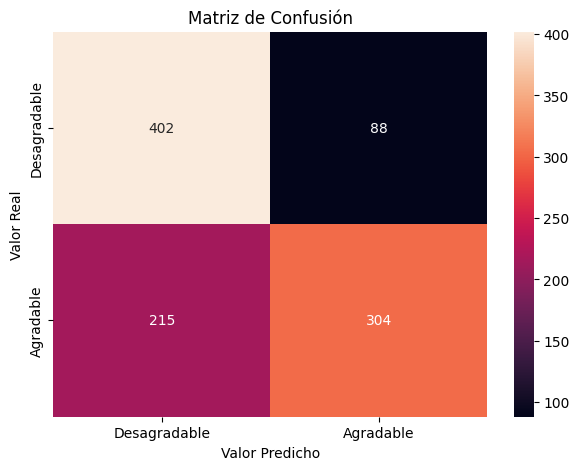

In [208]:
# Se instancia el clasificador SVC con los mejores parametros
best_svc= SVC(C=10, gamma=10, kernel='poly')
# Se entrena el clasificador con los datos de entrenamiento
best_svc.fit(X_train, y_train)
# Se obtiene el target predicho con los datos de prueba
y_pred = best_svc.predict(X_test)  

# se genera la matriz de confusion
cm = confusion_matrix(y_test, y_pred)

# se grafica la matriz de confusion
plt.figure(figsize=(7,5))
sns.heatmap(cm, annot=True, fmt='g', xticklabels=['Desagradable', 'Agradable'], yticklabels=['Desagradable', 'Agradable'])
plt.title('Matriz de Confusión')
plt.xlabel('Valor Predicho')
plt.ylabel('Valor Real')
plt.show()


In [209]:
# Se obtiene el reporte de clasificacion
print(classification_report(y_test, y_pred))

# Se procede a la validacion cruzada
scores = cross_val_score(best_svc,  X, y.ravel()) 

# Se imprime los resultados de la validacion cruzada
print( "Scores de la validación cruzada: ", scores)
print("Promedio de los scores: ", scores.mean())
print("Desviación estandar de los scores: ", scores.std())
print()
# Se procede a la validacion cruzada Kfold
cv = KFold(n_splits=5, random_state=48, shuffle= True)
scores = cross_val_score(knn, X, y.ravel(), cv=cv)

# Se imprime los resultados de la validacion cruzada Kfold
print( "Scores de la validación cruzada Kfold: ", scores)
print("Promedio de los scores: ", scores.mean())
print("Desviación estandar de los scores: ", scores.std())


              precision    recall  f1-score   support

           0       0.65      0.82      0.73       490
           1       0.78      0.59      0.67       519

    accuracy                           0.70      1009
   macro avg       0.71      0.70      0.70      1009
weighted avg       0.72      0.70      0.70      1009



Scores de la validación cruzada:  [0.68069307 0.63366337 0.52109181 0.67493797 0.71712159]
Promedio de los scores:  0.6455015600815666
Desviación estandar de los scores:  0.0676051789108273

Scores de la validación cruzada Kfold:  [0.62871287 0.66089109 0.65012407 0.64019851 0.65508685]
Promedio de los scores:  0.6470026779352873
Desviación estandar de los scores:  0.011391212215124258


#### Lista6 con test_size=0.2

In [210]:
# Se separan los datos de entrenamiento y de testeo con el tamaño test_size=0.5
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

In [211]:
# Se instancia el clasificador SVC
svc= SVC()

# Se define la grilla de parametros a probar
param_grid ={
    'kernel': ['linear', 'poly', 'rbf'],
    'C': [0.1, 1, 10],
    'gamma': [0.1, 1, 10]
}

# Se busca el mejor clasificador con los parametros definidos scoring='accuracy'
grid_search = GridSearchCV(svc, param_grid, cv=5, scoring='accuracy')
# Se entrena el clasificador con los datos de entrenamiento
grid_search.fit(X_train, y_train)

# Se muestra los mejores parametros
print("Scoring: Accuaracy")
print("Mejores parametros: ", grid_search.best_params_)
# Se muestra el mejor score
print("Mejor Score: ", grid_search.best_score_)


Scoring: Accuaracy
Mejores parametros:  {'C': 10, 'gamma': 10, 'kernel': 'poly'}
Mejor Score:  0.690443820501453


In [212]:
# Se busca el mejor clasificador con los parametros definidos scoring='precision'
grid_search = GridSearchCV(svc, param_grid, cv=5, scoring='precision')
# Se entrena el clasificador con los datos de entrenamiento
grid_search.fit(X_train, y_train)
# Se muestra los mejores parametros
print("Scoring: Precision")
print("Mejores parametros: ", grid_search.best_params_)
# Se muestra el mejor score
print("Mejor Score: ", grid_search.best_score_)


c:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMet

Scoring: Precision
Mejores parametros:  {'C': 0.1, 'gamma': 0.1, 'kernel': 'rbf'}
Mejor Score:  0.8336523125996809


In [213]:
# Se busca el mejor clasificador con los parametros definidos scoring='recall'
grid_search = GridSearchCV(svc, param_grid, cv=5, scoring='recall') 
# Se entrena el clasificador con los datos de entrenamiento
grid_search.fit(X_train, y_train)
# Se muestra los mejores parametros
print("Scoring: Recall")
print("Mejores parametros: ", grid_search.best_params_)
# Se muestra el mejor score
print("Mejor Score: ", grid_search.best_score_)

Scoring: Recall
Mejores parametros:  {'C': 10, 'gamma': 10, 'kernel': 'rbf'}
Mejor Score:  0.5888712871287127


In [214]:
# Se busca el mejor clasificador con los parametros definidos scoring='f1'
grid_search = GridSearchCV(svc, param_grid, cv=5, scoring='f1')
# Se entrena el clasificador con los datos de entrenamiento
grid_search.fit(X_train, y_train)
# Se muestra los mejores parametros
print("Scoring: f1")
print("Mejores parametros: ", grid_search.best_params_)
# Se muestra el mejor score
print("Mejor Score: ", grid_search.best_score_)

Scoring: f1
Mejores parametros:  {'C': 10, 'gamma': 10, 'kernel': 'poly'}
Mejor Score:  0.6427038377495315


##### Entonces se toma como los mejores parametros primero: scoring: precision, 'C': 0.1, 'gamma': 0.1, 'kernel': 'rbf con 0.83 y el de scoring Accuracy: 'C': 10, 'gamma': 10, 'kernel': 'poly' con  0.69

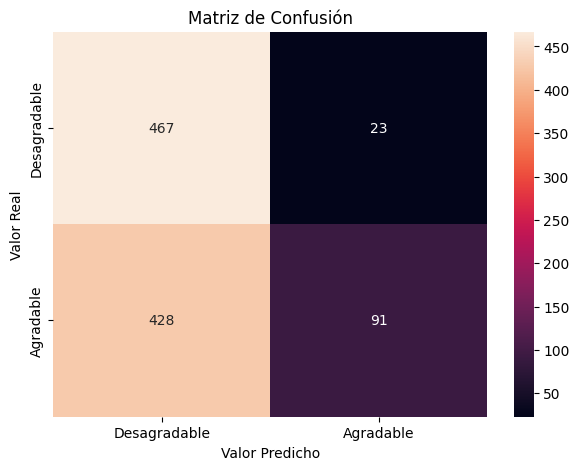

In [215]:
# Se instancia el clasificador SVC con los mejores parametros
best_svc= SVC(C=0.1, gamma=0.1, kernel='rbf')
# Se entrena el clasificador con los datos de entrenamiento
best_svc.fit(X_train, y_train)
# Se obtiene el target predicho con los datos de prueba
y_pred = best_svc.predict(X_test)  

# se genera la matriz de confusion
cm = confusion_matrix(y_test, y_pred)

# se grafica la matriz de confusion
plt.figure(figsize=(7,5))
sns.heatmap(cm, annot=True, fmt='g', xticklabels=['Desagradable', 'Agradable'], yticklabels=['Desagradable', 'Agradable'])
plt.title('Matriz de Confusión')
plt.xlabel('Valor Predicho')
plt.ylabel('Valor Real')
plt.show()


In [216]:
# Se obtiene el reporte de clasificacion
print(classification_report(y_test, y_pred))

# Se procede a la validacion cruzada
scores = cross_val_score(best_svc,  X, y.ravel()) 

# Se imprime los resultados de la validacion cruzada
print( "Scores de la validación cruzada: ", scores)
print("Promedio de los scores: ", scores.mean())
print("Desviación estandar de los scores: ", scores.std())
print()
# Se procede a la validacion cruzada Kfold
cv = KFold(n_splits=5, random_state=48, shuffle= True)
scores = cross_val_score(knn, X, y.ravel(), cv=cv)

# Se imprime los resultados de la validacion cruzada Kfold
print( "Scores de la validación cruzada Kfold: ", scores)
print("Promedio de los scores: ", scores.mean())
print("Desviación estandar de los scores: ", scores.std())


              precision    recall  f1-score   support

           0       0.52      0.95      0.67       490
           1       0.80      0.18      0.29       519

    accuracy                           0.55      1009
   macro avg       0.66      0.56      0.48      1009
weighted avg       0.66      0.55      0.48      1009

Scores de la validación cruzada:  [0.47772277 0.57920792 0.44168734 0.51612903 0.50372208]
Promedio de los scores:  0.5036938309215536
Desviación estandar de los scores:  0.04555505020023085

Scores de la validación cruzada Kfold:  [0.62871287 0.66089109 0.65012407 0.64019851 0.65508685]
Promedio de los scores:  0.6470026779352873
Desviación estandar de los scores:  0.011391212215124258


##### Ahora se prueba con el de scoring Accuracy: 'C': 10, 'gamma': 10, 'kernel': 'poly' con  0.69

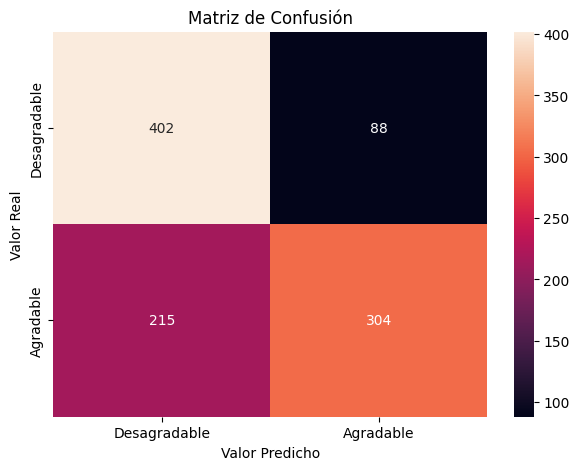

In [217]:
# Se instancia el clasificador SVC con los mejores parametros
best_svc= SVC(C=10, gamma=10, kernel='poly')
# Se entrena el clasificador con los datos de entrenamiento
best_svc.fit(X_train, y_train)
# Se obtiene el target predicho con los datos de prueba
y_pred = best_svc.predict(X_test)  

# se genera la matriz de confusion
cm = confusion_matrix(y_test, y_pred)

# se grafica la matriz de confusion
plt.figure(figsize=(7,5))
sns.heatmap(cm, annot=True, fmt='g', xticklabels=['Desagradable', 'Agradable'], yticklabels=['Desagradable', 'Agradable'])
plt.title('Matriz de Confusión')
plt.xlabel('Valor Predicho')
plt.ylabel('Valor Real')
plt.show()

In [218]:
# Se obtiene el reporte de clasificacion
print(classification_report(y_test, y_pred))

# Se procede a la validacion cruzada
scores = cross_val_score(best_svc,  X, y.ravel()) 

# Se imprime los resultados de la validacion cruzada
print( "Scores de la validación cruzada: ", scores)
print("Promedio de los scores: ", scores.mean())
print("Desviación estandar de los scores: ", scores.std())
print()
# Se procede a la validacion cruzada Kfold
cv = KFold(n_splits=5, random_state=48, shuffle= True)
scores = cross_val_score(knn, X, y.ravel(), cv=cv)

# Se imprime los resultados de la validacion cruzada Kfold
print( "Scores de la validación cruzada Kfold: ", scores)
print("Promedio de los scores: ", scores.mean())
print("Desviación estandar de los scores: ", scores.std())


              precision    recall  f1-score   support

           0       0.65      0.82      0.73       490
           1       0.78      0.59      0.67       519

    accuracy                           0.70      1009
   macro avg       0.71      0.70      0.70      1009
weighted avg       0.72      0.70      0.70      1009

Scores de la validación cruzada:  [0.68069307 0.63366337 0.52109181 0.67493797 0.71712159]
Promedio de los scores:  0.6455015600815666
Desviación estandar de los scores:  0.0676051789108273

Scores de la validación cruzada Kfold:  [0.62871287 0.66089109 0.65012407 0.64019851 0.65508685]
Promedio de los scores:  0.6470026779352873
Desviación estandar de los scores:  0.011391212215124258


#### Por lo analizado, nos quedamos con los valores de 'C': 10, 'gamma': 10, 'kernel': 'poly' con  0.69, con un test_size de 0.2

### Modelo Bayes (Naive Bayes)

In [230]:
# Se define los datos de entrada y salida
X1 = df[lista6]
Y1 = df['target']

# Se pasan los datos a arreglos de numpy
X = X1.to_numpy()
y = Y1.to_numpy()

#### Test_size de 0.5

In [220]:
# Se separan los datos de entrenamiento y de testeo con el tamaño test_size=0.5
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

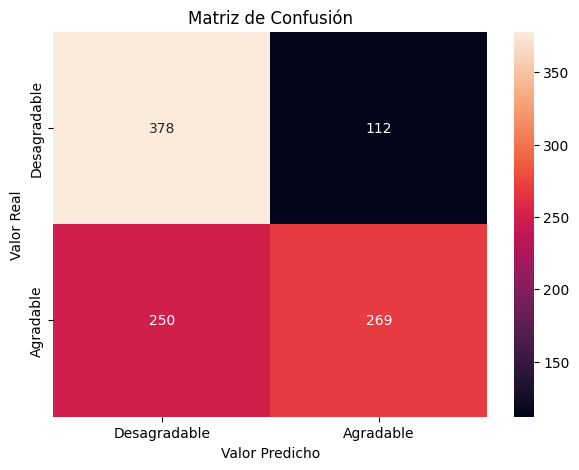

In [221]:

# Se instancia el modelo de Bayes
naive_bayes = GaussianNB()

# Se entrena el modelo con los datos de entrenamiento
naive_bayes.fit(X_train, y_train)

# Se obtiene el target predicho con los datos de prueba
y_pred = naive_bayes.predict(X_test)

# se genera la matriz de confusion
cm = confusion_matrix(y_test, y_pred)

# se grafica la matriz de confusion
plt.figure(figsize=(7,5))
sns.heatmap(cm, annot=True, fmt='g', xticklabels=['Desagradable', 'Agradable'], yticklabels=['Desagradable', 'Agradable'])
plt.title('Matriz de Confusión')
plt.xlabel('Valor Predicho')
plt.ylabel('Valor Real')
plt.show()

In [222]:
# Se obtiene el reporte de clasificacion
print(classification_report(y_test, y_pred))

# Se procede a la validacion cruzada
scores = cross_val_score(naive_bayes,  X, y.ravel()) 

# Se imprime los resultados de la validacion cruzada
print( "Scores de la validación cruzada: ", scores)
print("Promedio de los scores: ", scores.mean())
print("Desviación estandar de los scores: ", scores.std())
print()
# Se procede a la validacion cruzada Kfold
cv = KFold(n_splits=5, random_state=48, shuffle= True)
scores = cross_val_score(knn, X, y.ravel(), cv=cv)

# Se imprime los resultados de la validacion cruzada Kfold
print( "Scores de la validación cruzada Kfold: ", scores)
print("Promedio de los scores: ", scores.mean())
print("Desviación estandar de los scores: ", scores.std())


              precision    recall  f1-score   support

           0       0.60      0.77      0.68       490
           1       0.71      0.52      0.60       519

    accuracy                           0.64      1009
   macro avg       0.65      0.64      0.64      1009
weighted avg       0.66      0.64      0.64      1009

Scores de la validación cruzada:  [0.51732673 0.57673267 0.49131514 0.63027295 0.59305211]
Promedio de los scores:  0.5617399208903521
Desviación estandar de los scores:  0.050663978874195145

Scores de la validación cruzada Kfold:  [0.62871287 0.66089109 0.65012407 0.64019851 0.65508685]
Promedio de los scores:  0.6470026779352873
Desviación estandar de los scores:  0.011391212215124258


#### Test_size de 0.2

In [231]:
# Se separan los datos de entrenamiento y de testeo con el tamaño test_size=0.2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

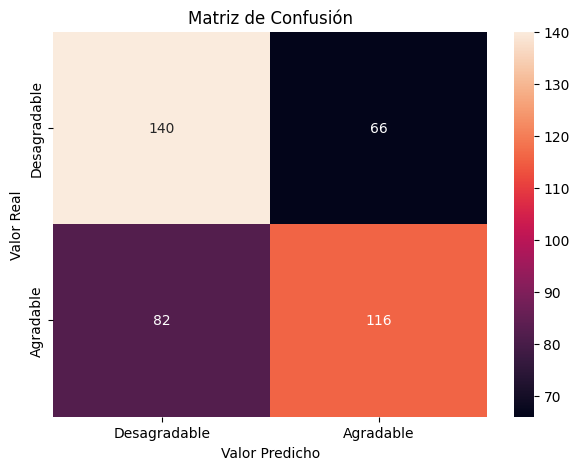

              precision    recall  f1-score   support

           0       0.63      0.68      0.65       206
           1       0.64      0.59      0.61       198

    accuracy                           0.63       404
   macro avg       0.63      0.63      0.63       404
weighted avg       0.63      0.63      0.63       404

Scores de la validación cruzada:  [0.51732673 0.57673267 0.49131514 0.63027295 0.59305211]
Promedio de los scores:  0.5617399208903521
Desviación estandar de los scores:  0.050663978874195145

Scores de la validación cruzada Kfold:  [0.62871287 0.66089109 0.65012407 0.64019851 0.65508685]
Promedio de los scores:  0.6470026779352873
Desviación estandar de los scores:  0.011391212215124258


In [232]:
# Se instancia el modelo de Bayes
naive_bayes = GaussianNB()

# Se entrena el modelo con los datos de entrenamiento
naive_bayes.fit(X_train, y_train)

# Se obtiene el target predicho con los datos de prueba
y_pred = naive_bayes.predict(X_test)

# se genera la matriz de confusion
cm = confusion_matrix(y_test, y_pred)

# se grafica la matriz de confusion
plt.figure(figsize=(7,5))
sns.heatmap(cm, annot=True, fmt='g', xticklabels=['Desagradable', 'Agradable'], yticklabels=['Desagradable', 'Agradable'])
plt.title('Matriz de Confusión')
plt.xlabel('Valor Predicho')
plt.ylabel('Valor Real')
plt.show()

# Se obtiene el reporte de clasificacion
print(classification_report(y_test, y_pred))

# Se procede a la validacion cruzada
scores = cross_val_score(naive_bayes,  X, y.ravel()) 

# Se imprime los resultados de la validacion cruzada
print( "Scores de la validación cruzada: ", scores)
print("Promedio de los scores: ", scores.mean())
print("Desviación estandar de los scores: ", scores.std())
print()
# Se procede a la validacion cruzada Kfold
cv = KFold(n_splits=5, random_state=48, shuffle= True)
scores = cross_val_score(knn, X, y.ravel(), cv=cv)

# Se imprime los resultados de la validacion cruzada Kfold
print( "Scores de la validación cruzada Kfold: ", scores)
print("Promedio de los scores: ", scores.mean())
print("Desviación estandar de los scores: ", scores.std())


#### Para este ultimo modelo, elejimos el test_size de 0.2

### Modelo Árbol de decisión

In [225]:
# Se define los datos de entrada y salida
X1 = df[lista6]
Y1 = df['target']

# Se pasan los datos a arreglos de numpy
X = X1.to_numpy()
y = Y1.to_numpy()

#### Test_size de 0.5

In [226]:
# Se separan los datos de entrenamiento y de testeo con el tamaño test_size=0.5
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

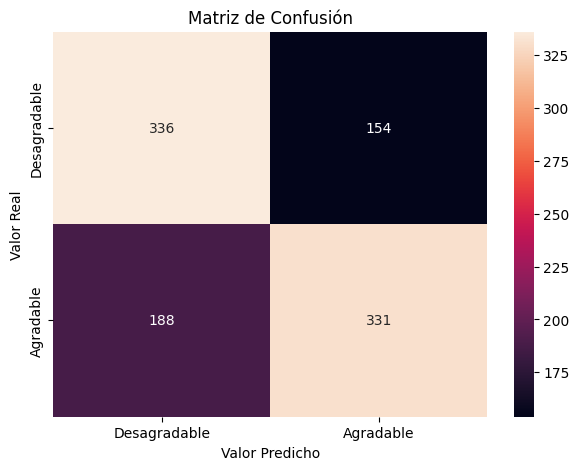

In [227]:
# Se instancia el modelo de arbol de decision
decision_tree = DecisionTreeClassifier(random_state=42)
# Se entrena el modelo con los datos de entrenamiento
decision_tree.fit(X_train, y_train) 

# Se obtiene el target predicho con los datos de prueba
y_pred = decision_tree.predict(X_test)

# se genera la matriz de confusion
cm = confusion_matrix(y_test, y_pred)

# se grafica la matriz de confusion
plt.figure(figsize=(7,5))
sns.heatmap(cm, annot=True, fmt='g', xticklabels=['Desagradable', 'Agradable'], yticklabels=['Desagradable', 'Agradable'])
plt.title('Matriz de Confusión')
plt.xlabel('Valor Predicho')
plt.ylabel('Valor Real')
plt.show()

In [228]:
# Se obtiene el reporte de clasificacion
print(classification_report(y_test, y_pred))

# Se procede a la validacion cruzada
scores = cross_val_score(decision_tree,  X, y.ravel()) 

# Se imprime los resultados de la validacion cruzada
print( "Scores de la validación cruzada: ", scores)
print("Promedio de los scores: ", scores.mean())
print("Desviación estandar de los scores: ", scores.std())
print()
# Se procede a la validacion cruzada Kfold
cv = KFold(n_splits=5, random_state=48, shuffle= True)
scores = cross_val_score(knn, X, y.ravel(), cv=cv)

# Se imprime los resultados de la validacion cruzada Kfold
print( "Scores de la validación cruzada Kfold: ", scores)
print("Promedio de los scores: ", scores.mean())
print("Desviación estandar de los scores: ", scores.std())

              precision    recall  f1-score   support

           0       0.64      0.69      0.66       490
           1       0.68      0.64      0.66       519

    accuracy                           0.66      1009
   macro avg       0.66      0.66      0.66      1009
weighted avg       0.66      0.66      0.66      1009

Scores de la validación cruzada:  [0.63366337 0.63613861 0.55583127 0.62779156 0.65260546]
Promedio de los scores:  0.6212060536078422
Desviación estandar de los scores:  0.03370851677337768

Scores de la validación cruzada Kfold:  [0.62871287 0.66089109 0.65012407 0.64019851 0.65508685]
Promedio de los scores:  0.6470026779352873
Desviación estandar de los scores:  0.011391212215124258


#### Test_size de 0.2

In [229]:
# Se separan los datos de entrenamiento y de testeo con el tamaño test_size=0.2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

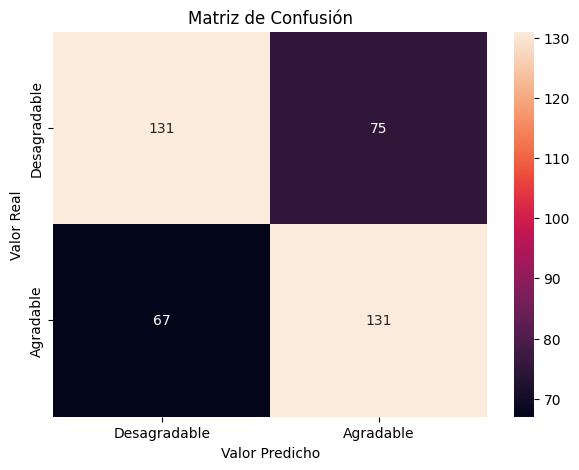

              precision    recall  f1-score   support

           0       0.66      0.64      0.65       206
           1       0.64      0.66      0.65       198

    accuracy                           0.65       404
   macro avg       0.65      0.65      0.65       404
weighted avg       0.65      0.65      0.65       404

Scores de la validación cruzada:  [0.63366337 0.63613861 0.55583127 0.62779156 0.65260546]
Promedio de los scores:  0.6212060536078422
Desviación estandar de los scores:  0.03370851677337768

Scores de la validación cruzada Kfold:  [0.62871287 0.66089109 0.65012407 0.64019851 0.65508685]
Promedio de los scores:  0.6470026779352873
Desviación estandar de los scores:  0.011391212215124258


In [233]:
# Se instancia el modelo de arbol de decision
decision_tree = DecisionTreeClassifier(random_state=42)
# Se entrena el modelo con los datos de entrenamiento
decision_tree.fit(X_train, y_train) 

# Se obtiene el target predicho con los datos de prueba
y_pred = decision_tree.predict(X_test)

# se genera la matriz de confusion
cm = confusion_matrix(y_test, y_pred)

# se grafica la matriz de confusion
plt.figure(figsize=(7,5))
sns.heatmap(cm, annot=True, fmt='g', xticklabels=['Desagradable', 'Agradable'], yticklabels=['Desagradable', 'Agradable'])
plt.title('Matriz de Confusión')
plt.xlabel('Valor Predicho')
plt.ylabel('Valor Real')
plt.show()

# Se obtiene el reporte de clasificacion
print(classification_report(y_test, y_pred))

# Se procede a la validacion cruzada
scores = cross_val_score(decision_tree,  X, y.ravel()) 

# Se imprime los resultados de la validacion cruzada
print( "Scores de la validación cruzada: ", scores)
print("Promedio de los scores: ", scores.mean())
print("Desviación estandar de los scores: ", scores.std())
print()
# Se procede a la validacion cruzada Kfold
cv = KFold(n_splits=5, random_state=48, shuffle= True)
scores = cross_val_score(knn, X, y.ravel(), cv=cv)

# Se imprime los resultados de la validacion cruzada Kfold
print( "Scores de la validación cruzada Kfold: ", scores)
print("Promedio de los scores: ", scores.mean())
print("Desviación estandar de los scores: ", scores.std())

#### Para este modelo, tambien elejimos el test_size de 0.2

# Ensamble de los modelos - Votación Mayoritaria

In [234]:
# Se define los datos de entrada y salida
X1 = df[lista6]
Y1 = df['target']

# Se pasan los datos a arreglos de numpy
X = X1.to_numpy()
y = Y1.to_numpy()

In [235]:
# Se separan los datos de entrenamiento y de testeo con el tamaño test_size=0.2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [237]:
# Modelo Knn Neighbors Classifier - k=11. test_size=0.2
knn = KNeighborsClassifier(n_neighbors=11)
knn.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=11)

In [238]:
# Modelo SVM - C=10, gamma=10, kernel='poly'. test_size=0.2
svm= SVC(C=10, gamma=10, kernel='poly')
svm.fit(X_train, y_train)


SVC(C=10, gamma=10, kernel='poly')

In [239]:
# Modelo Naive Bayes - test_size=0.2
naive_bayes = GaussianNB()
naive_bayes.fit(X_train, y_train)

GaussianNB()

In [240]:
# Modelo Decision Tree - test_size=0.2
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

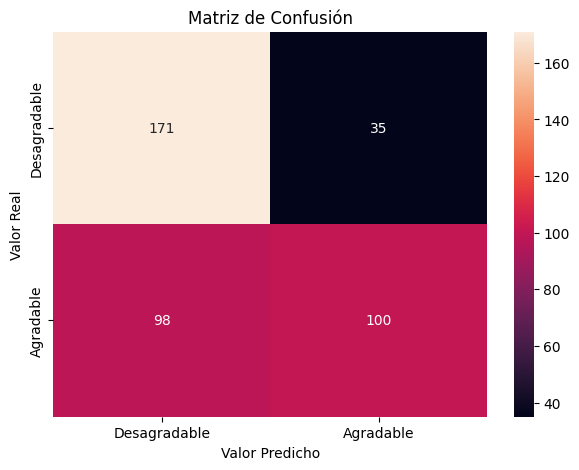

In [242]:
# se calcula la prediccion con los datos de prueba con el modelo KNN Nearest Neighbors
knn_predictions = knn.predict(X_test)
# se calcula la prediccion con los datos de prueba con el modelo SVC
svc_predictions = best_svc.predict(X_test)
# se calcula la prediccion con los datos de prueba con el modelo Naive Bayes
naive_bayes_predictions = naive_bayes.predict(X_test)
# se calcula la prediccion con los datos de prueba con el modelo Decision Tree
decision_tree_predictions = decision_tree.predict(X_test)

# Ensable
# Se declara un arreglo para guardar las predicciones
final_predictions = []

for k, s, n, dt in zip(knn_predictions, svc_predictions, naive_bayes_predictions, decision_tree_predictions):
    votes = { 0: 0, 1: 0, 2:0}
    votes[k] += 1
    votes[s] += 1
    votes[n] += 1
    votes[dt] += 1
    majority_votes = max(votes, key=votes.get)
    final_predictions.append(majority_votes)
    
# se genera la matriz de confusion
cm = confusion_matrix(y_test, final_predictions)

# se grafica la matriz de confusion
plt.figure(figsize=(7,5))
sns.heatmap(cm, annot=True, fmt='g', xticklabels=['Desagradable', 'Agradable'], yticklabels=['Desagradable', 'Agradable'])
plt.title('Matriz de Confusión')
plt.xlabel('Valor Predicho')
plt.ylabel('Valor Real')
plt.show()

In [243]:
# Se obtiene el reporte de clasificacion
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.66      0.64      0.65       206
           1       0.64      0.66      0.65       198

    accuracy                           0.65       404
   macro avg       0.65      0.65      0.65       404
weighted avg       0.65      0.65      0.65       404

